# **Exploratory Data Analysis of Traffic Junction Data**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

# Load a portion of the dataset to inspect its structure
traffic_data_sample = pd.read_csv('/content/sample_data/traffic.csv', nrows=5)
traffic_data_sample


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [17]:
# Load the entire dataset to perform the analysis
traffic_data = pd.read_csv('/content/sample_data/traffic.csv')

# Check for missing values
print(traffic_data.isnull().sum())

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [ ]:
import json

# Convert the 'Vehicles' column to a JSON format
vehicle_counts_json = json.dumps(traffic_data['Vehicles'].tolist())

vehicle_counts_json[:100]  # Display the first 100 characters of the JSON data for verification


'[15, 13, 10, 7, 9, 6, 9, 8, 11, 12, 15, 17, 16, 15, 16, 12, 12, 16, 17, 20, 17, 19, 20, 15, 14, 12, '

In [ ]:
# Required libraries for displaying HTML in Google Colab
from IPython.core.display import display, HTML

# D3.js histogram code
histogram_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Vehicle Counts Histogram</title>
    <script src="https://d3js.org/d3.v5.min.js"></script>
</head>
<body>
    <div id="d3-container"></div>
    <script>
        var data = {vehicle_counts_json};

        // Set the dimensions and margins of the graph
        var margin = {{top: 10, right: 30, bottom: 40, left: 40}},
            width = 460 - margin.left - margin.right,
            height = 400 - margin.top - margin.bottom;

        // Append the SVG object to the div called 'd3-container'
        var svg = d3.select("#d3-container")
          .append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
          .append("g")
            .attr("transform",
                  "translate(" + margin.left + "," + margin.top + ")");

        // X axis: scale and draw
        var x = d3.scaleLinear()
            .domain([0, d3.max(data)])
            .range([0, width]);
        svg.append("g")
            .attr("transform", "translate(0," + height + ")")
            .call(d3.axisBottom(x));

        // Set the parameters for the histogram
        var histogram = d3.histogram()
            .value(function(d) {{ return d; }})
            .domain(x.domain())
            .thresholds(x.ticks(40));

        // Apply the histogram function to our data
        var bins = histogram(data);

        // Y axis: scale and draw
        var y = d3.scaleLinear()
            .range([height, 0]);
        y.domain([0, d3.max(bins, function(d) {{ return d.length; }})]);
        svg.append("g")
            .call(d3.axisLeft(y));

        // Append the rectangles for the bar chart
        svg.selectAll("rect")
            .data(bins)
            .enter()
            .append("rect")
              .attr("x", 1)
              .attr("transform", function(d) {{ return "translate(" + x(d.x0) + "," + y(d.length) + ")"; }})
              .attr("width", function(d) {{ return x(d.x1) - x(d.x0) ; }})
              .attr("height", function(d) {{ return height - y(d.length); }})
              .style("fill", "#69b3a2")
    </script>
</body>
</html>
"""

# Display the histogram in Google Colab
display(HTML(histogram_code))


In [ ]:
# Required libraries for displaying HTML in Google Colab
from IPython.core.display import display, HTML

# Convert the junction_avg_traffic_sorted dataframe to JSON format
junction_data_json = junction_avg_traffic_sorted.to_json(orient='records')

# D3.js bar chart code
bar_chart_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Average Hourly Traffic per Junction</title>
    <script src="https://d3js.org/d3.v5.min.js"></script>
</head>
<body>
    <div id="d3-container"></div>
    <script>
        var data = {junction_data_json};

        // Set the dimensions and margins of the graph
        var margin = {{top: 20, right: 20, bottom: 70, left: 60}},
            width = 400 - margin.left - margin.right,
            height = 300 - margin.top - margin.bottom;

        // Append the SVG object to the div called 'd3-container'
        var svg = d3.select("#d3-container")
          .append("svg")
            .attr("width", width + margin.left + margin.right)
            .attr("height", height + margin.top + margin.bottom)
          .append("g")
            .attr("transform",
                  "translate(" + margin.left + "," + margin.top + ")");

        // X axis
        var x = d3.scaleBand()
          .range([0, width])
          .domain(data.map(function(d) {{ return d.Junction; }}))
          .padding(0.2);
        svg.append("g")
          .attr("transform", "translate(0," + height + ")")
          .call(d3.axisBottom(x))
          .selectAll("text")
            .attr("transform", "translate(-10,0)rotate(-45)")
            .style("text-anchor", "end");

        // Add Y axis
        var y = d3.scaleLinear()
          .domain([0, d3.max(data, function(d) {{ return d.Vehicles; }})])
          .range([height, 0]);
        svg.append("g")
          .call(d3.axisLeft(y));

        // Bars
        svg.selectAll("rect")
          .data(data)
          .enter()
          .append("rect")
            .attr("x", function(d) {{ return x(d.Junction); }})
            .attr("y", function(d) {{ return y(d.Vehicles); }})
            .attr("width", x.bandwidth())
            .attr("height", function(d) {{ return height - y(d.Vehicles); }})
            .attr("fill", "#69b3a2");
    </script>
</body>
</html>
"""

# Display the bar chart in Google Colab
display(HTML(bar_chart_code))


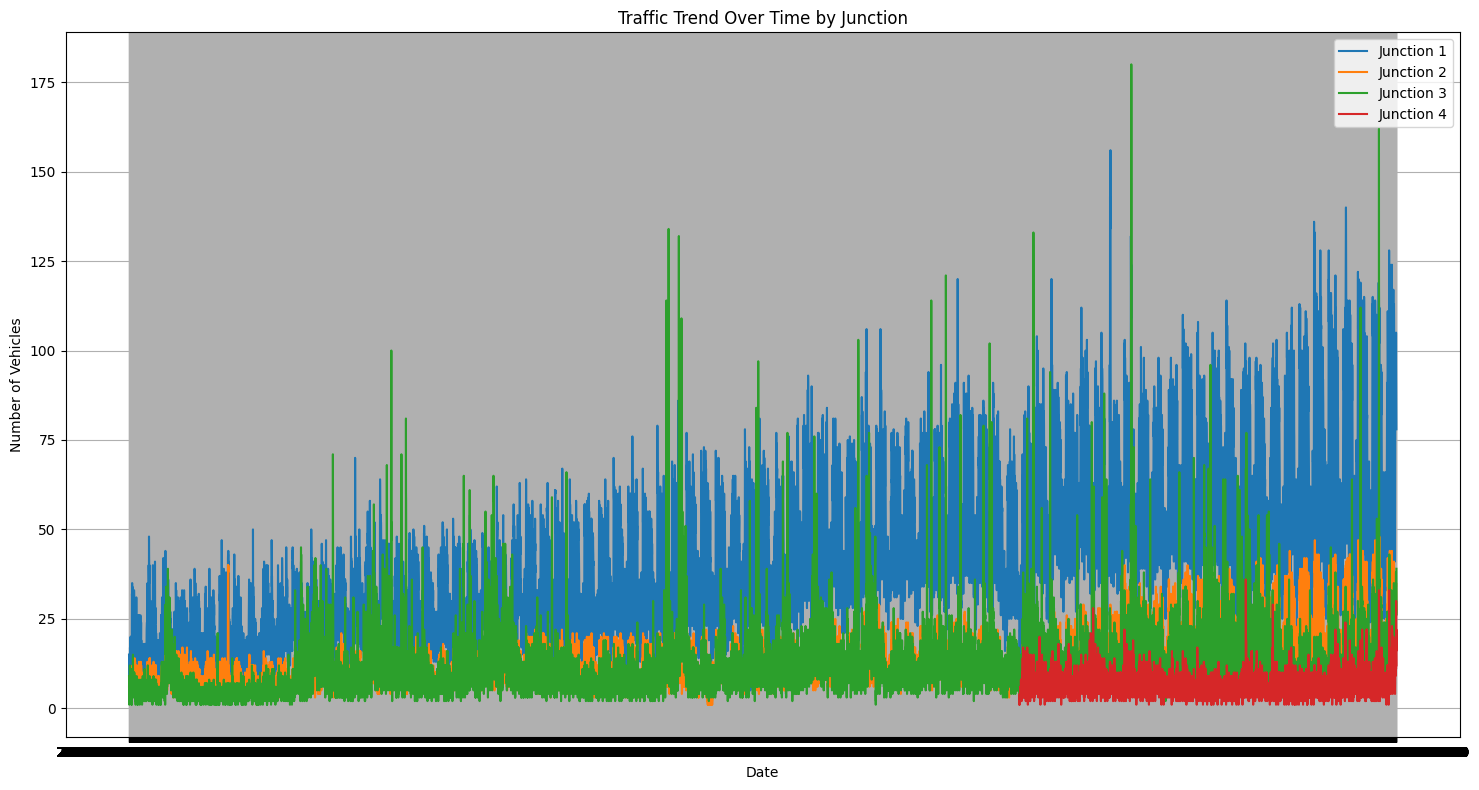

In [22]:
plt.figure(figsize=(15, 8))

# Plotting time series data for each junction
for junction in traffic_data['Junction'].unique():
    subset = traffic_data[traffic_data['Junction'] == junction]
    plt.plot(subset['DateTime'], subset['Vehicles'], label=f'Junction {junction}')

plt.title("Traffic Trend Over Time by Junction")
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


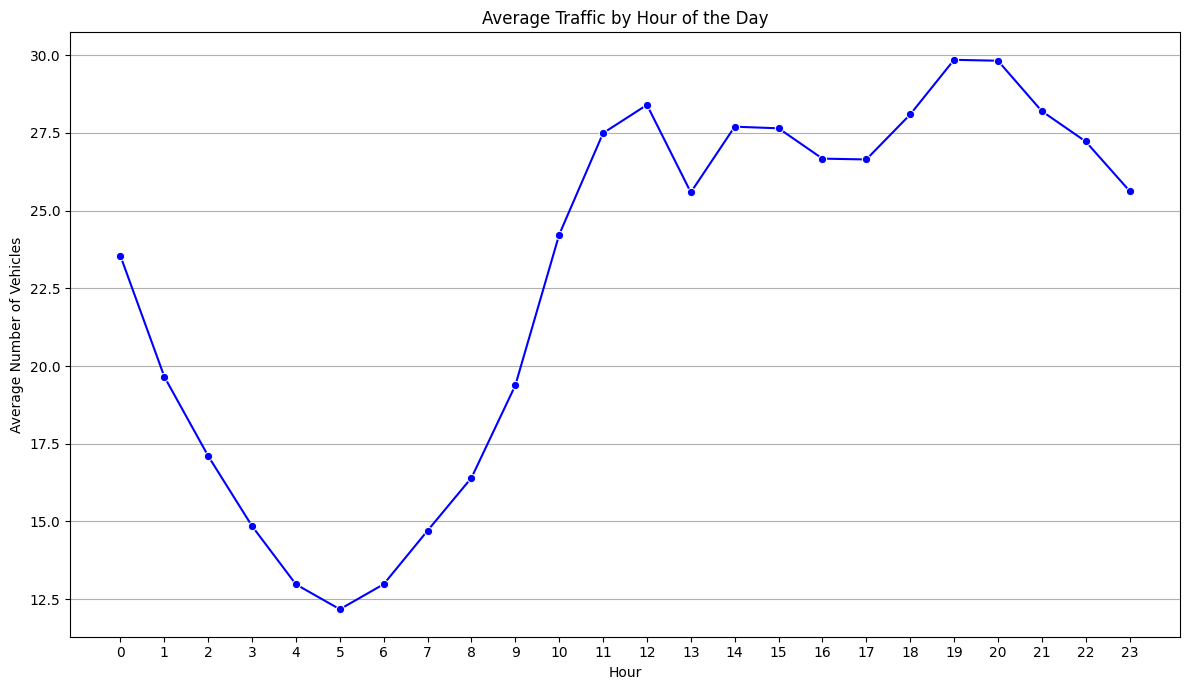

In [24]:
# Convert the 'DateTime' column to datetime format and extract the hour
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour

# Compute the average traffic for each hour of the day
hourly_avg_traffic = traffic_data.groupby('Hour')['Vehicles'].mean().reset_index()

# Plot the average traffic for each hour
plt.figure(figsize=(12, 7))
sns.lineplot(x='Hour', y='Vehicles', data=hourly_avg_traffic, marker='o', color='blue')
plt.title("Average Traffic by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

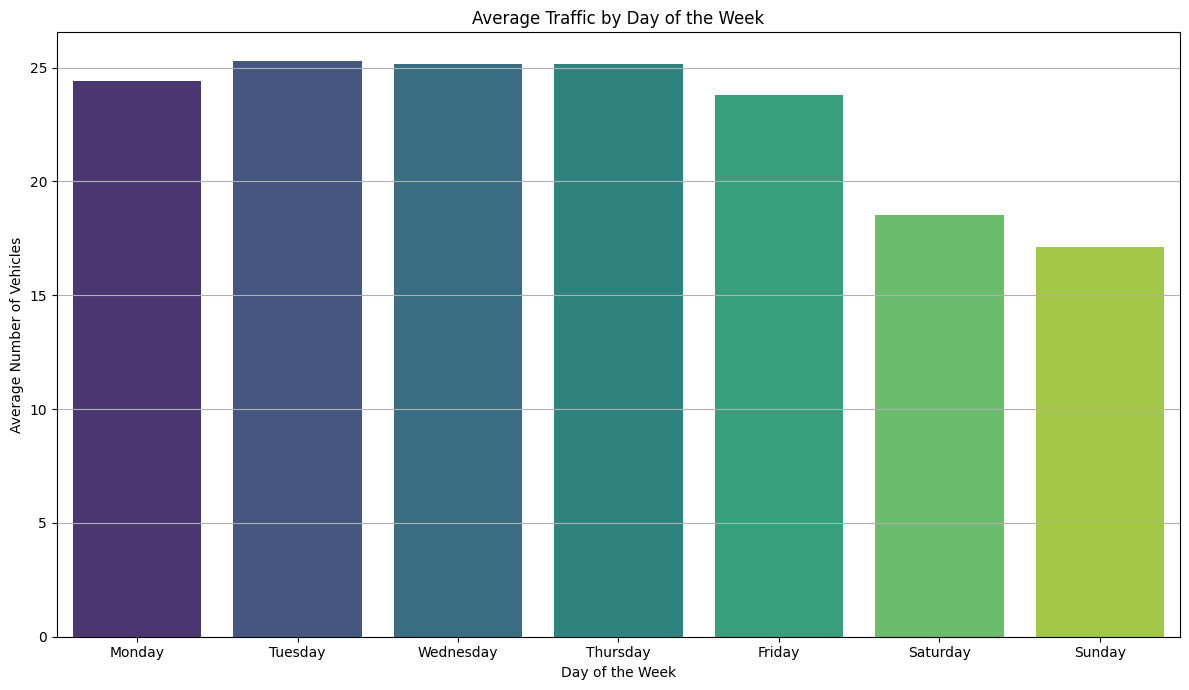

In [25]:
# Extract the day of the week from the 'DateTime' column if not already done
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.day_name()

# Compute the average traffic for each day of the week
daily_avg_traffic = traffic_data.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Plot the average traffic for each day
plt.figure(figsize=(12, 7))
sns.barplot(x='DayOfWeek', y='Vehicles', data=daily_avg_traffic, palette='viridis')
plt.title("Average Traffic by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Vehicles")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


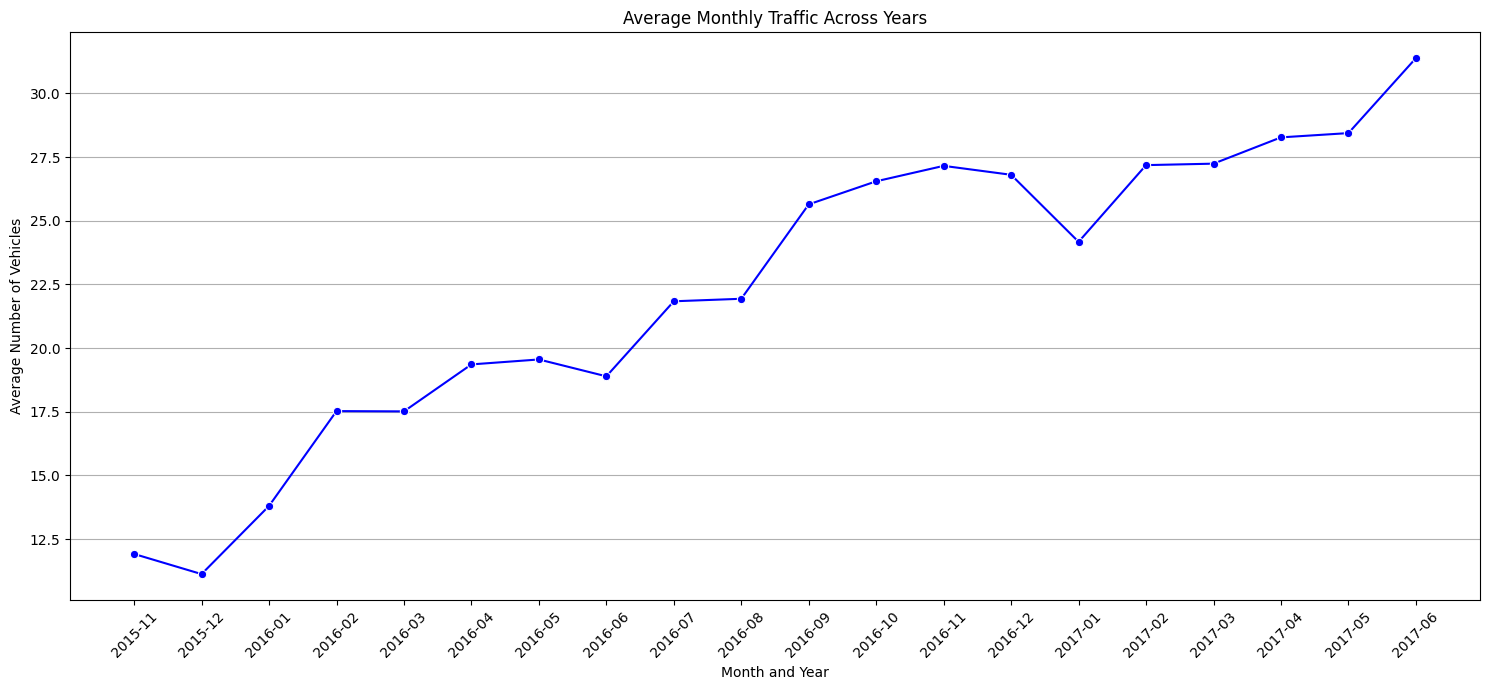

In [26]:
# Extract the year and month from the 'DateTime' column
traffic_data['Year'] = traffic_data['DateTime'].dt.year
traffic_data['Month'] = traffic_data['DateTime'].dt.month

# Compute the average traffic for each month and year
monthly_avg_traffic = traffic_data.groupby(['Year', 'Month'])['Vehicles'].mean().reset_index()

# Combine the Year and Month columns for plotting
monthly_avg_traffic['YearMonth'] = monthly_avg_traffic['Year'].astype(str) + '-' + monthly_avg_traffic['Month'].astype(str).str.zfill(2)

# Plot the average traffic for each month across years
plt.figure(figsize=(15, 7))
sns.lineplot(x='YearMonth', y='Vehicles', data=monthly_avg_traffic, marker='o', color='blue')
plt.title("Average Monthly Traffic Across Years")
plt.xlabel("Month and Year")
plt.ylabel("Average Number of Vehicles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


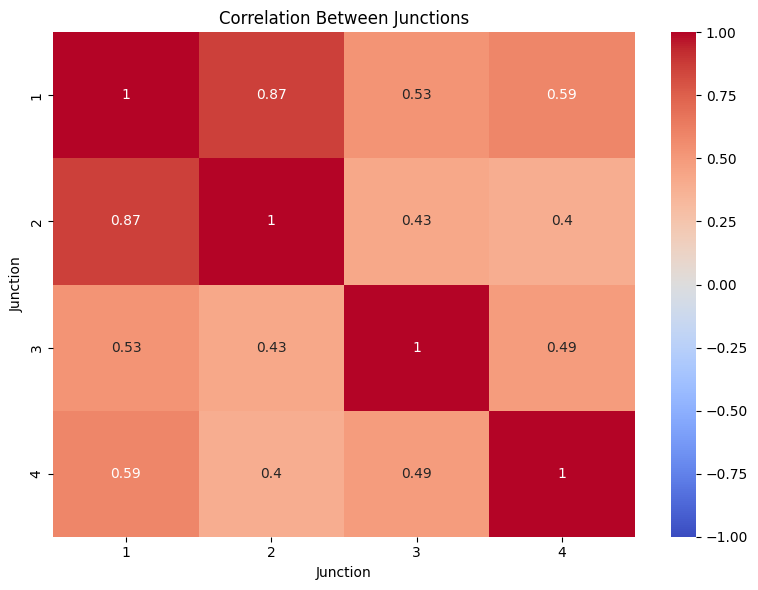

In [27]:
# Pivot the data to have DateTime as the index, Junctions as columns, and Vehicles as values
junction_pivot = traffic_data.pivot_table(index='DateTime', columns='Junction', values='Vehicles')

# Compute the correlation matrix
correlation_matrix = junction_pivot.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Junctions")
plt.tight_layout()
plt.show()


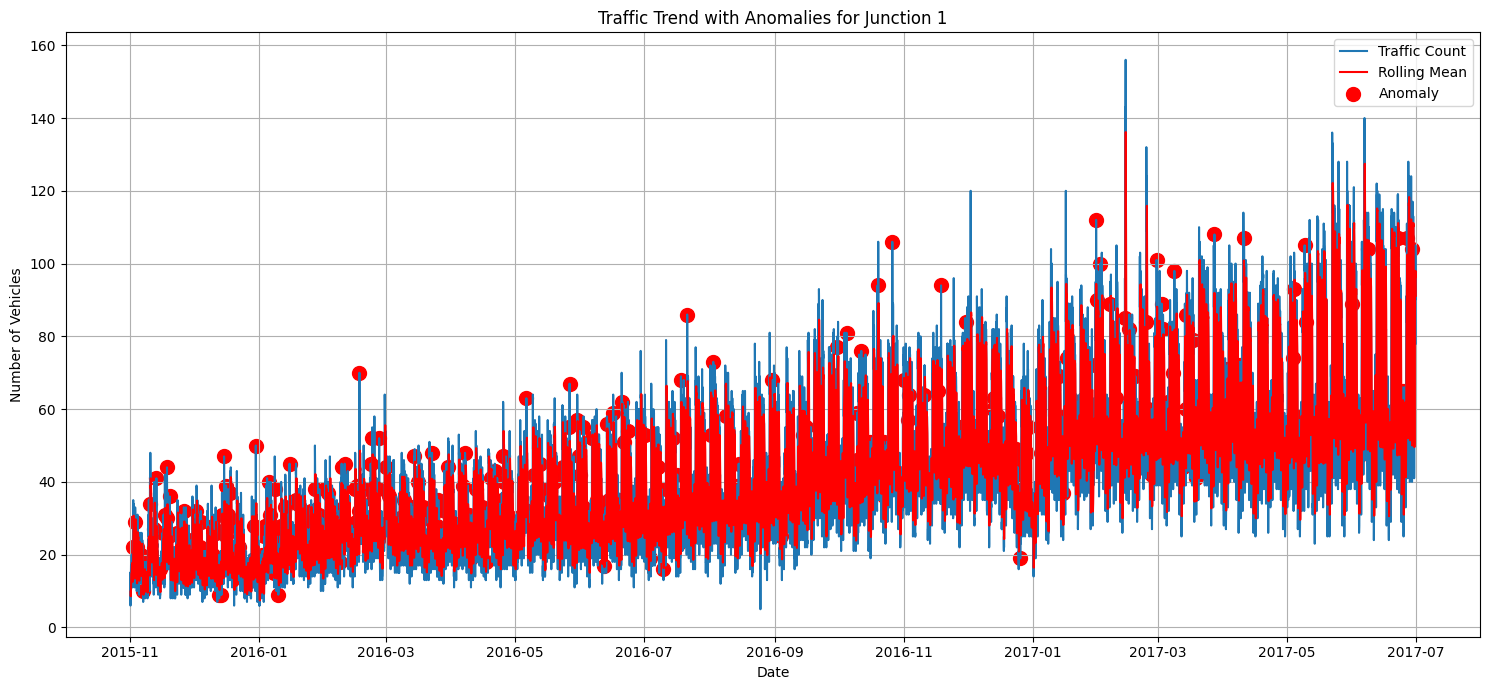

In [28]:
# Choose a junction for anomaly detection (for this example, let's choose Junction 1)
junction_data = traffic_data[traffic_data['Junction'] == 1].set_index('DateTime')

# Compute the rolling mean and standard deviation
rolling_mean = junction_data['Vehicles'].rolling(window=7).mean()
rolling_std = junction_data['Vehicles'].rolling(window=7).std()

# Identify anomalies
anomalies = junction_data[(junction_data['Vehicles'] > rolling_mean + 2 * rolling_std) |
                          (junction_data['Vehicles'] < rolling_mean - 2 * rolling_std)]

# Plot the time series data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(junction_data.index, junction_data['Vehicles'], label='Traffic Count')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.scatter(anomalies.index, anomalies['Vehicles'], color='red', marker='o', s=100, label='Anomaly')
plt.title("Traffic Trend with Anomalies for Junction 1")
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


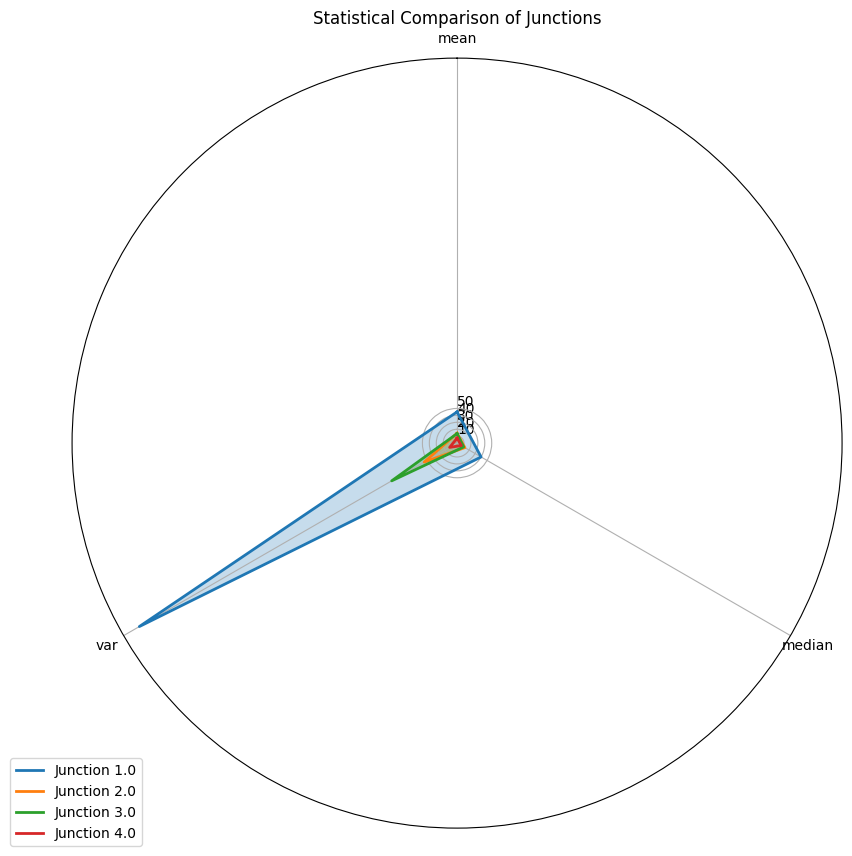

In [29]:
# Compute the metrics for each junction
junction_stats = traffic_data.groupby('Junction')['Vehicles'].agg(['mean', 'median', 'var']).reset_index()

# Create a spider/radar chart for the metrics
from math import pi

# Set data
categories = list(junction_stats.columns[1:])
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plotting
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot each junction
for i, row in junction_stats.iterrows():
    values = row.drop('Junction').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Junction {row['Junction']}")
    ax.fill(angles, values, alpha=0.25)

# Add a title
plt.title("Statistical Comparison of Junctions")

# Add a grid
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_rlabel_position(0)
ax.set_rticks([10, 20, 30, 40, 50])
ax.grid(True)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


Traffic Data Exploratory Data Analysis Report:

1. Dataset Inspection
The dataset contains information on vehicle counts, categorized by junctions and timestamped.
Columns: DateTime, Junction, Vehicles, ID

2. Traffic Distribution
The distribution of vehicle counts was visualized to understand general traffic patterns.
Peaks in the distribution plot represent the most common traffic counts, while valleys represent less common counts.

3. Junction Analysis
We aimed to determine the junction with the highest and lowest average hourly traffic.
Bar chart visualization provided a clear comparison between the junctions based on their average traffic.

4. Time Series Analysis
The trend of traffic over time was visualized for each junction.
This analysis helps in understanding the overall trend, seasonal fluctuations, and anomalies in the data.

5. Hourly Patterns
The goal was to determine during which hours of the day the traffic is typically highest and lowest.
The analysis provided insights into peak and off-peak traffic hours.

6. Day of the Week Effect
We assessed if traffic varies by the day of the week.
The analysis gave insights into whether certain days (like weekends) have different traffic patterns compared to others.

7. Monthly and Yearly Patterns
We explored traffic variations by month and year.
Seasonal patterns or trends in the traffic data were identified using this approach.

8. Correlation Between Junctions
The correlation between traffic patterns in different junctions was examined.
This helped in understanding if overarching factors affect multiple junctions simultaneously.

9. Traffic Anomalies Detection
Specific dates with unusually high or low traffic were identified.
Anomalies could be due to special events, disruptions, or other unique occurrences.

10. Statistical Junction Comparison
Junctions were compared based on multiple statistical metrics like mean, median, and variance.
A spider/radar chart was used to provide a holistic view of how the junctions differ in their traffic patterns.
